# Data Visualization

   The goal of this notebook is to do final processing on the features added to original dataset as well as creating visualizations relating to the features working with the different parts of a URL. Reference back to "data_loading" for more information.
    
   Looking into the features: protocol, www_present, sub_domain, domain, top_domain, dir, file, path, fragment, query, and status

**Import Statement**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("parsed_url_features.csv")
df.columns

Index(['Unnamed: 0', 'url', 'protocol', 'www_present', 'sub_domain', 'domain',
       'top_domain', 'dir', 'file', 'path', 'fragment', 'query', 'status',
       'n_period', 'n_hyphens', 'n_underscore', 'n_slash', 'n_questionmrk',
       'n_equals', 'n_at', 'n_and', 'n_exclamation', 'url_length',
       'domain_name_correct'],
      dtype='object')

In [17]:
df.dropna(subset=['status'], inplace=True)

<Axes: xlabel='status', ylabel='count'>

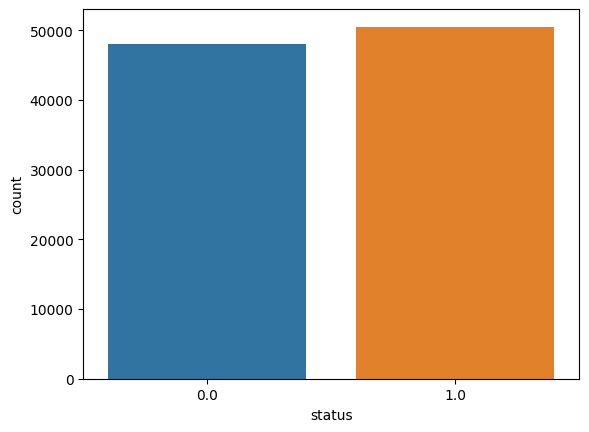

In [18]:
# bar graph to show the distribution of classes "legit" and "phish"
# Observation: the dataset is pretty balanced
sns.countplot(x=df["status"], data=df)

In [19]:
df

,Unnamed: 0,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,path,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
0,11,https://ghfdc.knuodwq.cn/,https,NaN,ghfdc,knuodwq,cn,NaN,NaN,/,...,0,0,3,0,0,0,0,0,25,1
1,12,https://rakutenluyaw.ouxawer-p.net/,https,NaN,rakutenluyaw,ouxawer-p,net,NaN,NaN,/,...,1,0,3,0,0,0,0,0,35,1
2,13,pulsagratiss-1010.000webhostapp.com,NaN,NaN,pulsagratiss-1010,000webhostapp,com,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,35,1
3,14,idjvn.com,NaN,NaN,NaN,idjvn,com,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,9,0
4,15,http://www.vmveg.com//vendor/phpunit/phpunit/s...,http,www,www.,vmveg,com,NaN,/vendor/phpunit/phpunit/src/Util/PHP/redirect.php,//vendor/phpunit/phpunit/src/Util/PHP/redirect...,...,0,0,10,1,0,0,0,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100006,interceder.net/topic/Guy-Turcotte,NaN,NaN,NaN,interceder,net,/topic/,Guy-Turcotte,/topic/Guy-Turcotte,...,1,0,2,0,0,0,0,0,33,1
99996,100007,ifes.org/Divisions/List-Projects.aspx,NaN,NaN,NaN,ifes,org,/Divisions/,List-Projects.aspx,/Divisions/List-Projects.aspx,...,1,0,2,0,0,0,0,0,37,0
99997,100008,en.wikipedia.org/wiki/Jeffrey_Lynn,NaN,NaN,en,wikipedia,org,/wiki/,Jeffrey_Lynn,/wiki/Jeffrey_Lynn,...,0,1,2,0,0,0,0,0,34,1
99998,100009,ccdowney.com/bible-college/,NaN,NaN,NaN,ccdowney,com,/bible-college/,NaN,/bible-college/,...,1,0,2,0,0,0,0,0,27,1


In [21]:
df_numbers = df.drop(["url","protocol", "www_present", "sub_domain", "domain", "top_domain", "dir", 
                      "file", "path", "fragment", "query", "domain_name_correct", "Unnamed: 0"], axis="columns")

In [22]:
df.drop(["Unnamed: 0"], axis="columns", inplace=True)

In [23]:
df_numbers

,status,n_period,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length
0,0.0,2,0,0,3,0,0,0,0,0,25
1,0.0,2,1,0,3,0,0,0,0,0,35
2,0.0,2,1,0,0,0,0,0,0,0,35
3,0.0,1,0,0,0,0,0,0,0,0,9
4,0.0,3,0,0,10,1,0,0,0,0,74
...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1,1,0,2,0,0,0,0,0,33
99996,1.0,2,1,0,2,0,0,0,0,0,37
99997,1.0,2,0,1,2,0,0,0,0,0,34
99998,1.0,1,1,0,2,0,0,0,0,0,27


**Pairplot to show the relationship between the amount of symbols and if a URL is legit**

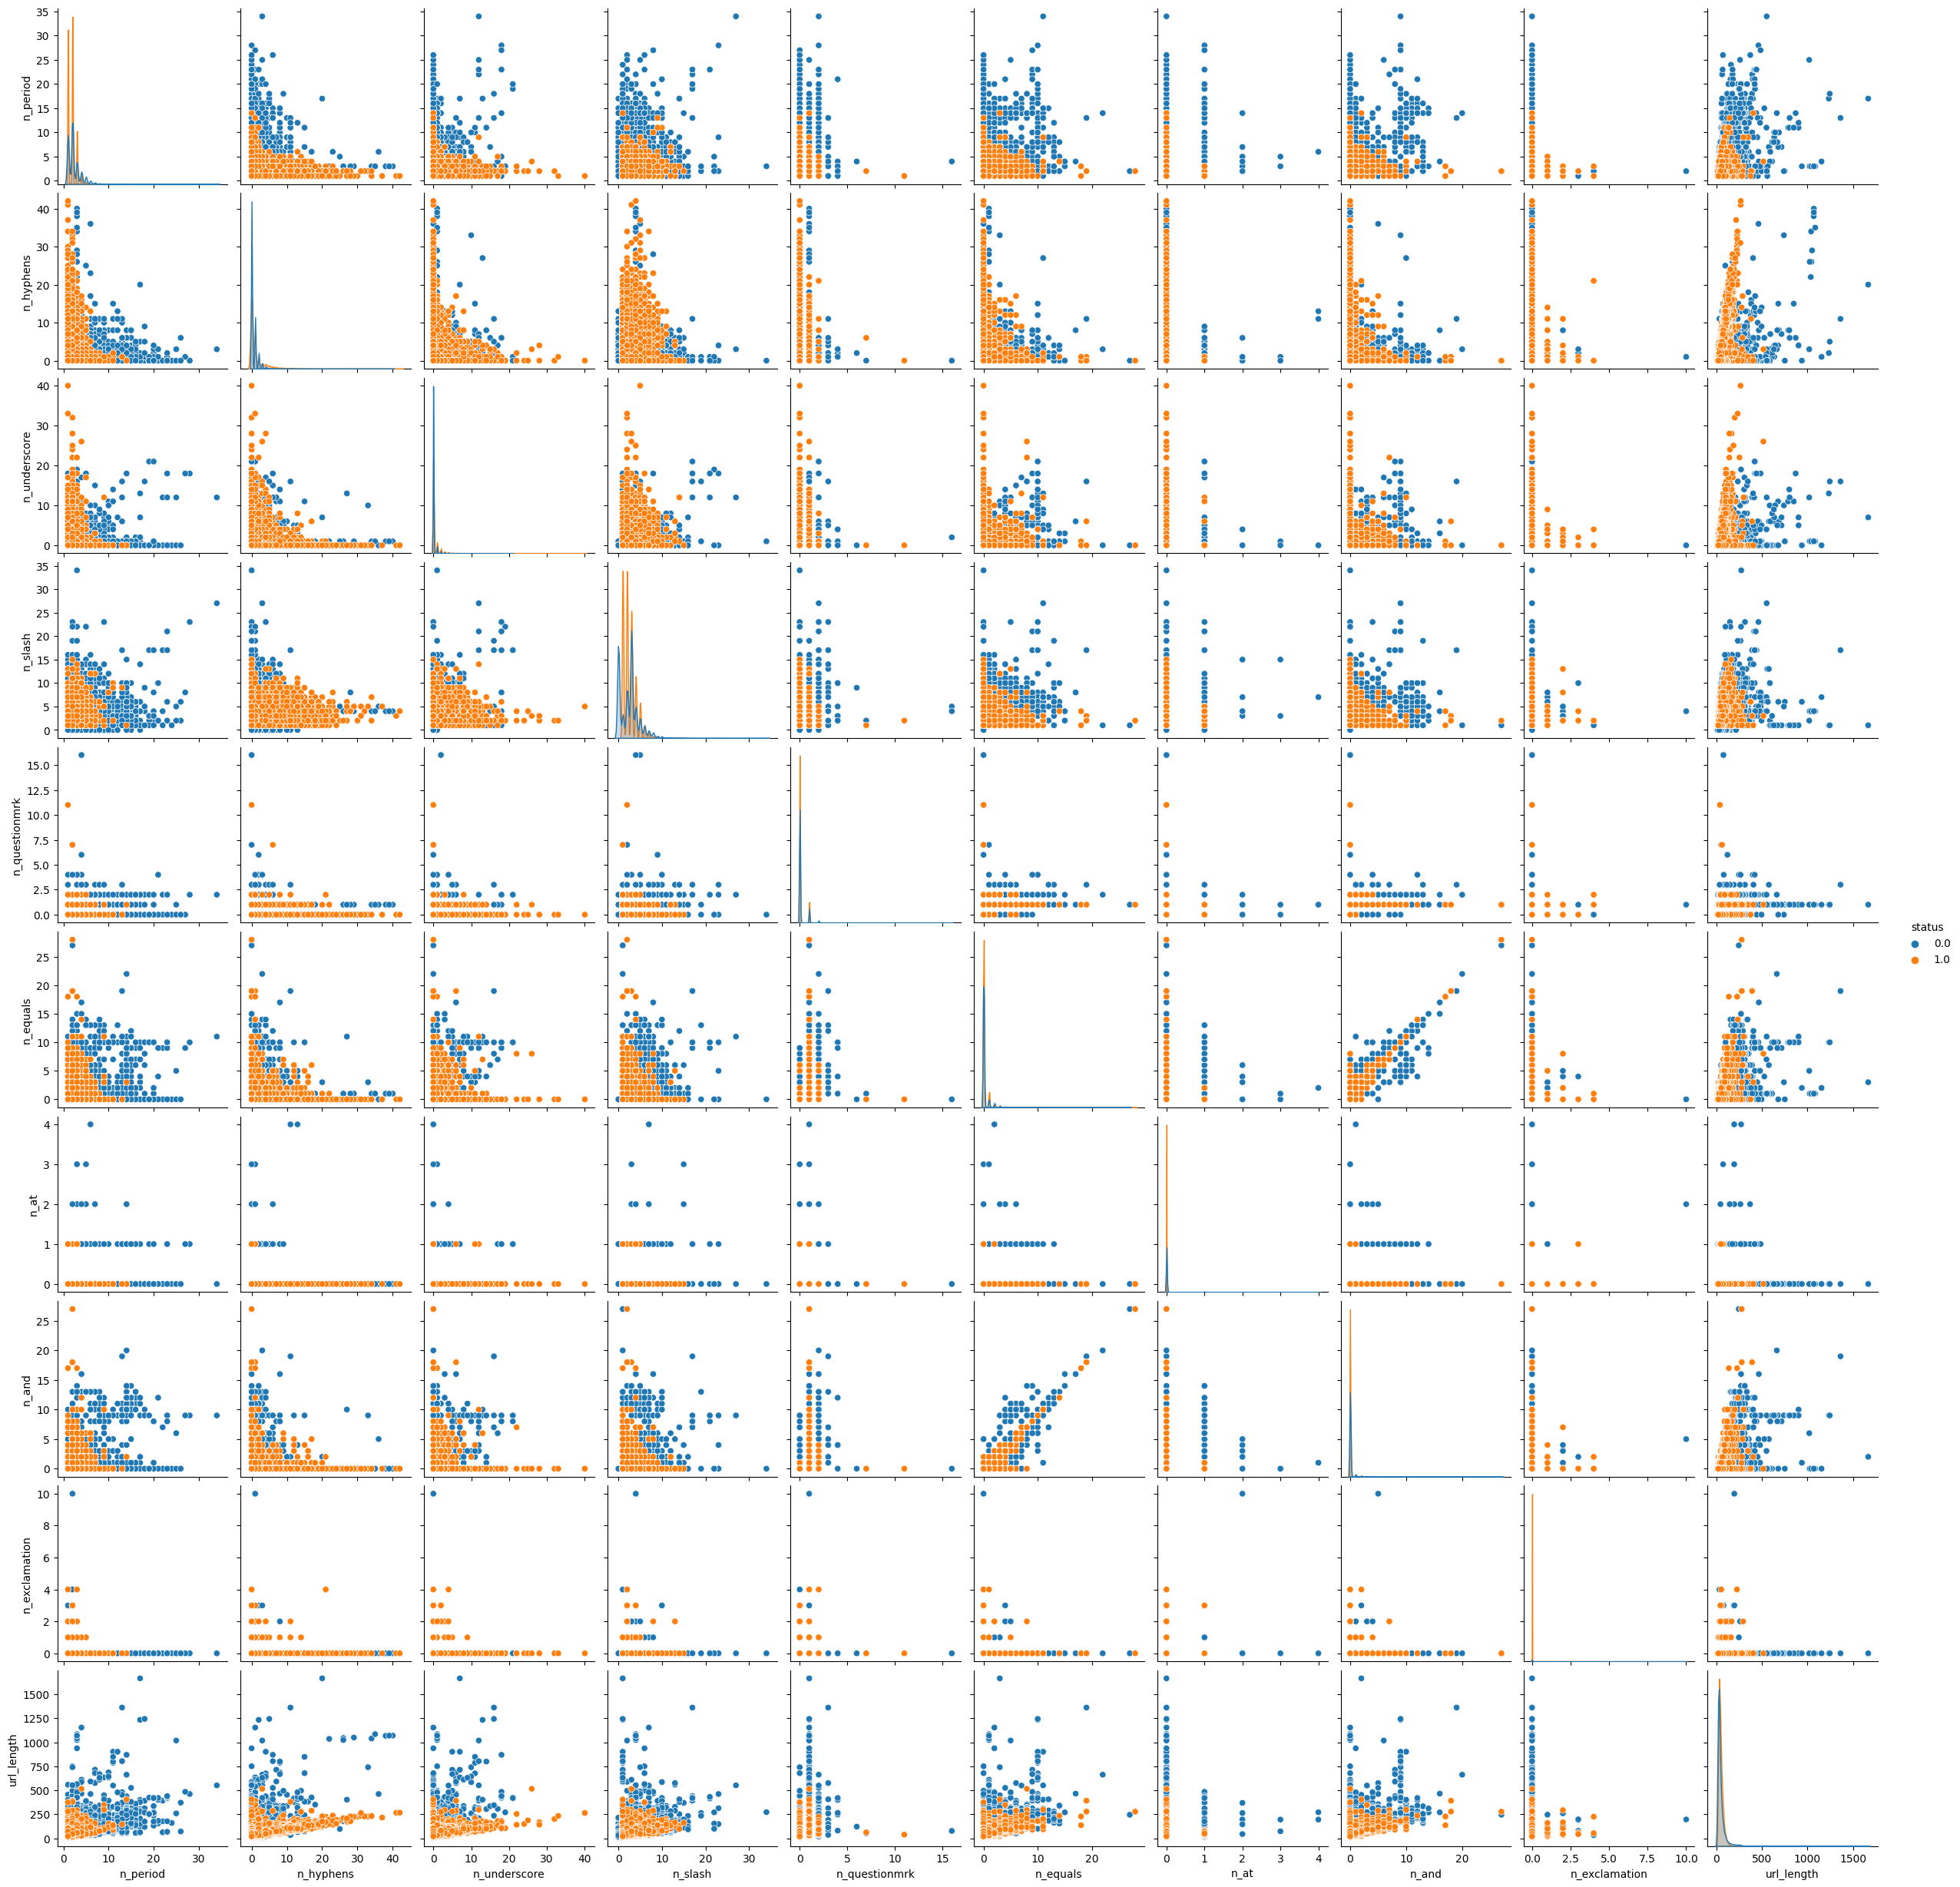

In [9]:
sns.pairplot(data=df_numbers, hue="status")

**Bargraph to show how many null values are in each feature**

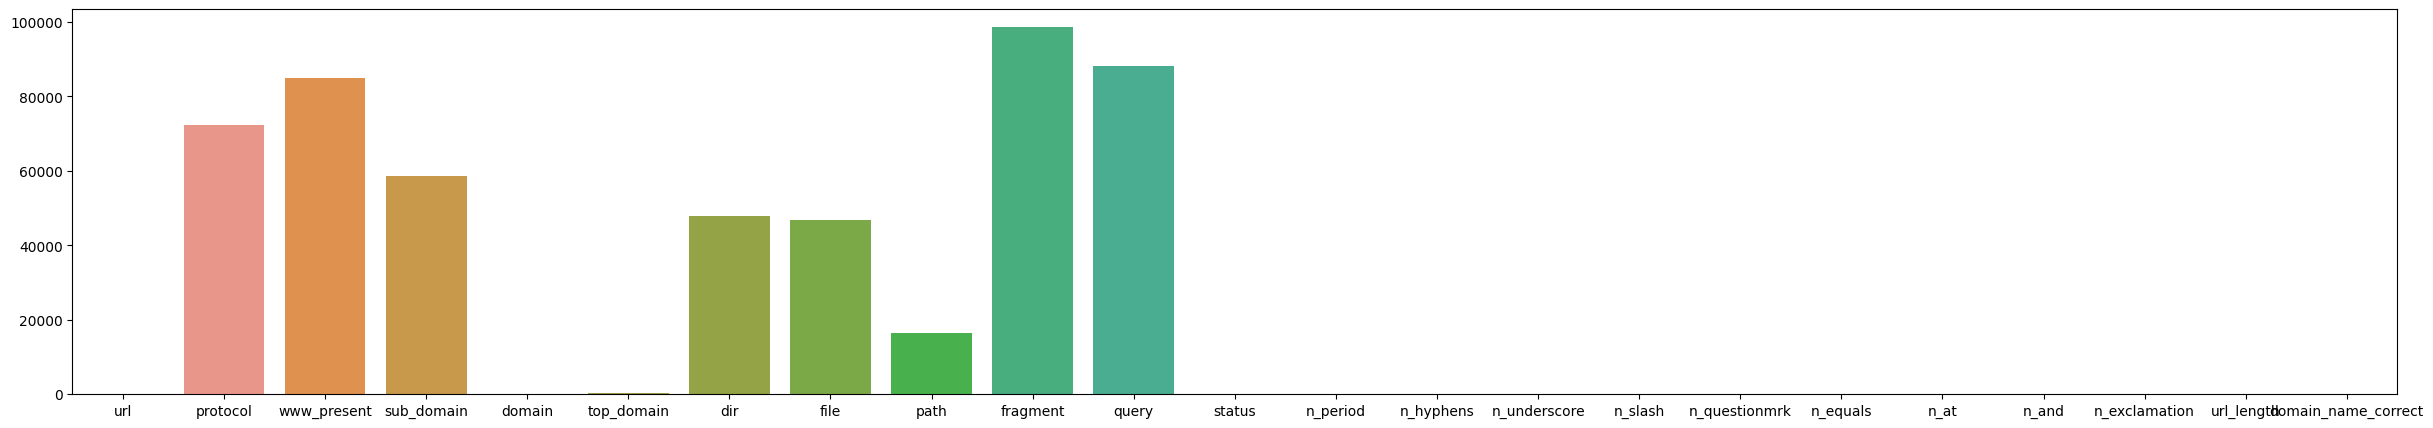

In [24]:
# graph the number of null values in the data
plt.figure(figsize=(30, 5))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.show()

**Heatmap comparing the protocol and status features**

In [25]:
df["protocol"].unique()

array(['https', nan, 'http', 'ttps'], dtype=object)

In [26]:
# do a heatmap with protocol and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
http_df = df['protocol'] == "http"
none_protocol_df = df['protocol'] == "nan"
https_df = df['protocol'] == "https"
ttps_df = df['protocol'] == "ttps"
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_http_df = len(df_only_legit[~none_protocol_df & ~https_df & ~ttps_df])
legit_nan_df = len(df_only_legit[~http_df & ~https_df & ~ttps_df])
legit_https_df = len(df_only_legit[~none_protocol_df & ~http_df & ~ttps_df])
legit_ttps_df = len(df_only_legit[~none_protocol_df & ~https_df & ~http_df])

phish_http_df = len(df_only_phish[~none_protocol_df & ~https_df & ~ttps_df])
phish_nan_df = len(df_only_phish[~http_df & ~https_df & ~ttps_df])
phish_https_df = len(df_only_phish[~none_protocol_df & ~http_df & ~ttps_df])
phish_ttps_df = len(df_only_phish[~none_protocol_df & ~https_df & ~http_df])
phish = [phish_http_df/(legit_http_df+phish_http_df), 
         phish_nan_df/(legit_nan_df+phish_nan_df), 
         phish_https_df/(legit_https_df+phish_https_df), 
         phish_ttps_df/(legit_ttps_df+phish_ttps_df)]
legit = [legit_http_df/(legit_http_df+phish_http_df), 
         legit_nan_df/(legit_nan_df+phish_nan_df), 
         legit_https_df/(legit_https_df+phish_https_df), 
         legit_ttps_df/(legit_ttps_df+phish_ttps_df)]


print(phish_nan_df)
print(legit_nan_df)

heatmap_dataset = pd.DataFrame(np.array([phish, legit]), columns=df["protocol"].unique(), index=[0, 1])
heatmap_dataset.head()
# do a heatmap with www_present and status
# do a heatmap with domain_name_correct and status


25873
46462


/tmp/ipykernel_3919593/1967256941.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_http_df = len(df_only_legit[~none_protocol_df & ~https_df & ~ttps_df])
/tmp/ipykernel_3919593/1967256941.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_nan_df = len(df_only_legit[~http_df & ~https_df & ~ttps_df])
/tmp/ipykernel_3919593/1967256941.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_https_df = len(df_only_legit[~none_protocol_df & ~http_df & ~ttps_df])
/tmp/ipykernel_3919593/1967256941.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_ttps_df = len(df_only_legit[~none_protocol_df & ~https_df & ~http_df])
/tmp/ipykernel_3919593/1967256941.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_http_df = len(df_only_phish[~none_protocol_df & ~https_df & ~ttps_df])
/tmp/ipykernel_3919593/1967256

,https,NaN,http,ttps
0,0.40617,0.357683,0.45712,0.357701
1,0.59383,0.642317,0.54288,0.642299


Text(0.5, 23.52222222222222, 'Protocol')

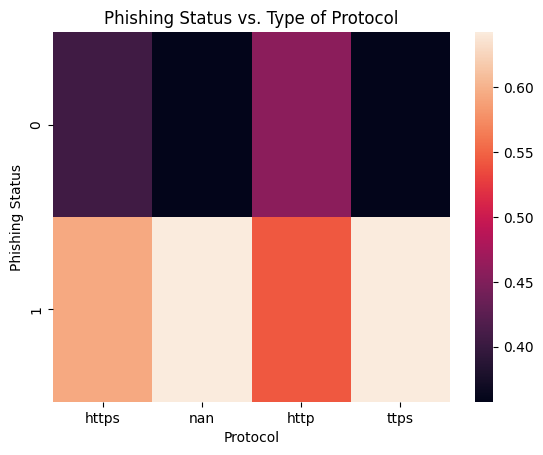

In [27]:
ax = plt.axes()
sns.heatmap(heatmap_dataset, ax=ax).set(title='Phishing Status vs. Type of Protocol')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Protocol")

In [28]:
df["www_present"].unique()

array([nan, 'www'], dtype=object)

**Heatmap comparing www_present and status features**

In [29]:
# do a heatmap with www_present and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
www_df = df['www_present'] == "www"
none_www_df = df['www_present'] == "nan"
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_www_df = len(df_only_legit[~none_www_df])
legit_nan_df = len(df_only_legit[~www_df])
legit = [legit_www_df/101_428, legit_nan_df/87_904]

phish_www_df = len(df_only_phish[~none_www_df])
phish_nan_df = len(df_only_phish[~www_df])
phish = [phish_www_df/101_428, phish_nan_df/87_904]

print(legit_nan_df)
print(phish_nan_df)

heatmap_dataset1 = pd.DataFrame(np.array([phish, legit]), columns=df["www_present"].unique(), index=[0, 1])
heatmap_dataset.head()
# do a heatmap with www_present and status
# do a heatmap with domain_name_correct and status

44523
40525


/tmp/ipykernel_3919593/3508457179.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_www_df = len(df_only_legit[~none_www_df])
/tmp/ipykernel_3919593/3508457179.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_nan_df = len(df_only_legit[~www_df])
/tmp/ipykernel_3919593/3508457179.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_www_df = len(df_only_phish[~none_www_df])
/tmp/ipykernel_3919593/3508457179.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_nan_df = len(df_only_phish[~www_df])


,https,NaN,http,ttps
0,0.40617,0.357683,0.45712,0.357701
1,0.59383,0.642317,0.54288,0.642299


Text(0.5, 23.52222222222222, 'Protocol')

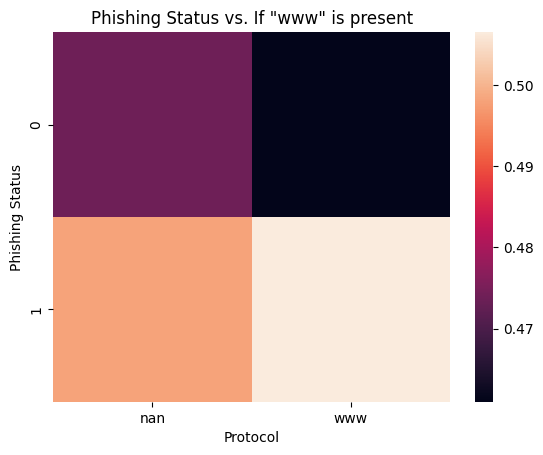

In [30]:
ax = plt.axes()
sns.heatmap(heatmap_dataset1, ax=ax).set(title='Phishing Status vs. If "www" is present')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Protocol")

In [31]:
df["domain_name_correct"].unique()

array([1, 0])

**Heatmap comparing domain_name_correct and status features**

In [32]:
# do a heatmap with domain_name_correct and status
# do a heatmap with www_present and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
good_spell_domain = df['domain_name_correct'] == 1
bad_spell_domain = df['domain_name_correct'] == 0
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_good_df = len(df_only_legit[~bad_spell_domain])
legit_bad_df = len(df_only_legit[~good_spell_domain])
legit = [legit_good_df/74_931, legit_bad_df/26_497]

phish_good_df = len(df_only_phish[~bad_spell_domain])
phish_bad_df = len(df_only_phish[~good_spell_domain])
phish = [phish_good_df/74_931, phish_bad_df/26_497]

print(legit_bad_df)
print(phish_bad_df)

heatmap_dataset2 = pd.DataFrame(np.array([phish, legit]), columns=df["domain_name_correct"].unique(), index=[0, 1])
heatmap_dataset2.head()

10258
13383


/tmp/ipykernel_3919593/235585999.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_good_df = len(df_only_legit[~bad_spell_domain])
/tmp/ipykernel_3919593/235585999.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_bad_df = len(df_only_legit[~good_spell_domain])
/tmp/ipykernel_3919593/235585999.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_good_df = len(df_only_phish[~bad_spell_domain])
/tmp/ipykernel_3919593/235585999.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_bad_df = len(df_only_phish[~good_spell_domain])


,1,0
0,0.462786,0.505076
1,0.537214,0.387138


Text(0.5, 23.52222222222222, 'Domain Name Spelled Correct')

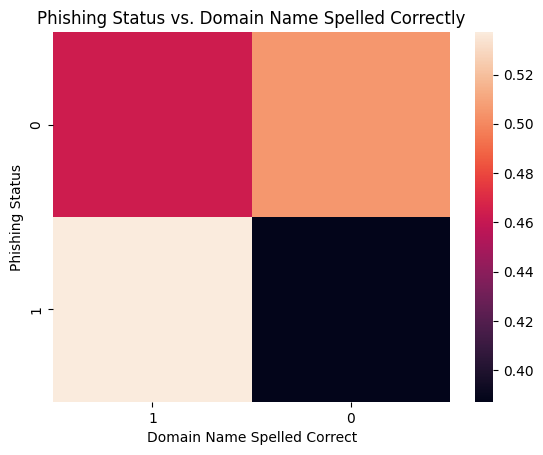

In [33]:
ax = plt.axes()
sns.heatmap(heatmap_dataset2, ax=ax).set(title='Phishing Status vs. Domain Name Spelled Correctly')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Domain Name Spelled Correct")

**Distirbution of Url Length Values Depending on class of Url "legit" and "phish"**

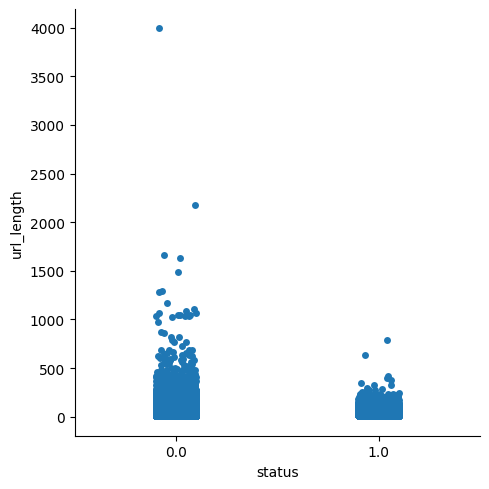

In [34]:
sns.catplot(data=df, x="status", y="url_length")

Observation made about counted old features: Underscores are not very useful for the analysis, because there are not any. Other attribues are just not going to be that useful, because there isn't enough of them in the dataset to be siginficant. Some of them being, questionmark, and Exclamation marks

In [35]:
df.columns

Index(['url', 'protocol', 'www_present', 'sub_domain', 'domain', 'top_domain',
       'dir', 'file', 'path', 'fragment', 'query', 'status', 'n_period',
       'n_hyphens', 'n_underscore', 'n_slash', 'n_questionmrk', 'n_equals',
       'n_at', 'n_and', 'n_exclamation', 'url_length', 'domain_name_correct'],
      dtype='object')

**Preparaing to make a dataframe to show the rest of the categorical variables compared against status**

In [39]:
# drop underscores, questonmark, and exclamation marks
# do a multi with the following features: sub_domain, top_domain, dir, file, path, fragment, query
heatmap_df = df.drop(columns=["url", "protocol", "www_present", "domain","domain_name_correct",
                                    "n_hyphens", "n_slash", "n_equals", "n_at", "n_and", "url_length", "n_period",
                             "n_underscore", "n_questionmrk", "n_exclamation"])
heatmap_df

,sub_domain,top_domain,dir,file,path,fragment,query,status
0,1,1,0,0,1,0,0,0.0
1,1,1,0,0,1,0,0,0.0
2,1,1,0,0,0,0,0,0.0
3,0,1,0,0,0,0,0,0.0
4,1,1,0,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...
99995,0,1,1,1,1,0,0,1.0
99996,0,1,1,1,1,0,0,1.0
99997,1,1,1,1,1,0,0,1.0
99998,0,1,1,0,1,0,0,1.0


**Converting all categorical variables to 0 or 1**
- this conversion is dependent on if the value is NaN or if it is filled with some sort of string
- this conversion is trying to show if it is more favorable to have a certain element in a url for the benefit of it being legit

In [40]:
# protocol, www_present, sub_domain, domain, top_domain, dir, file, path, fragment, query, and status
df["protocol"] = df["protocol"].notnull().astype('int')
df["www_present"] = df["www_present"].notnull().astype('int')
df["sub_domain"] = df["sub_domain"].notnull().astype('int')
df["domain"] = df["domain"].notnull().astype('int')
df["top_domain"] = df["top_domain"].notnull().astype('int')
df["dir"] = df["dir"].notnull().astype('int')
df["file"] = df["file"].notnull().astype('int')
df["path"] = df["path"].notnull().astype('int')
df["fragment"] = df["fragment"].notnull().astype('int')
df["query"] = df["query"].notnull().astype('int')

**Looping through the remaining variables to create DataFrame suited for a heatmap**

In [43]:
heatmap_df

,sub_domain,top_domain,dir,file,path,fragment,query,status
0,1,1,0,0,1,0,0,0.0
1,1,1,0,0,1,0,0,0.0
2,1,1,0,0,0,0,0,0.0
3,0,1,0,0,0,0,0,0.0
4,1,1,0,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...
99995,0,1,1,1,1,0,0,1.0
99996,0,1,1,1,1,0,0,1.0
99997,1,1,1,1,1,0,0,1.0
99998,0,1,1,0,1,0,0,1.0


In [55]:
# do a multi with the following features: sub_domain, top_domain, dir, file, path, fragment, query
# do a heatmap with domain_name_correct and status
# do a heatmap with www_present and status
heatmap_set = list()
for column, content in heatmap_df.iteritems():
    print(column)
    legit_df = heatmap_df['status'] == 1
    phish_df = heatmap_df['status'] == 0
    present = heatmap_df[column] == 1
    not_present = heatmap_df[column] == 0
    df_only_phish = heatmap_df[~legit_df]
    df_only_legit = heatmap_df[~phish_df]

    legit_not_present = len(df_only_legit[~present])
    legit_present = len(df_only_legit[~not_present])

    phish_not_present = len(df_only_phish[~present])
    phish_present = len(df_only_phish[~not_present])
    legit = [legit_present/(legit_present+phish_present), legit_not_present/(phish_not_present+legit_not_present)]
    phish = [phish_present/(legit_present+phish_present), phish_not_present/(phish_not_present+legit_not_present)]

    heat = pd.DataFrame(np.array([phish, legit]), columns=["present", "not_present"], index=["phishing", "legit"])
    heatmap_set.append(heat)

sub_domain
top_domain
dir
file
path
fragment
query
status


/tmp/ipykernel_3919593/672088384.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, content in heatmap_df.iteritems():
/tmp/ipykernel_3919593/672088384.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_not_present = len(df_only_legit[~present])
/tmp/ipykernel_3919593/672088384.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_present = len(df_only_legit[~not_present])
/tmp/ipykernel_3919593/672088384.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_not_present = len(df_only_phish[~present])
/tmp/ipykernel_3919593/672088384.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_present = len(df_only_phish[~not_present])
/tmp/ipykernel_3919593/672088384.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_not_present = len(df

In [53]:
heatmap_set

[           present  not_present
 phishing  0.560185     0.437894
 legit     0.439815     0.562106,
            present  not_present
 phishing  0.486521          1.0
 legit     0.513479          0.0,
            present  not_present
 phishing  0.320388      0.66516
 legit     0.679612      0.33484,
            present  not_present
 phishing  0.307556      0.68641
 legit     0.692444      0.31359,
            present  not_present
 phishing  0.384722     0.997461
 legit     0.615278     0.002539,
            present  not_present
 phishing  0.605634     0.487477
 legit     0.394366     0.512523,
            present  not_present
 phishing  0.434471     0.493784
 legit     0.565529     0.506216,
           present  not_present
 phishing      0.0          1.0
 legit         1.0          0.0]

**Set up for matrix of heatmaps**

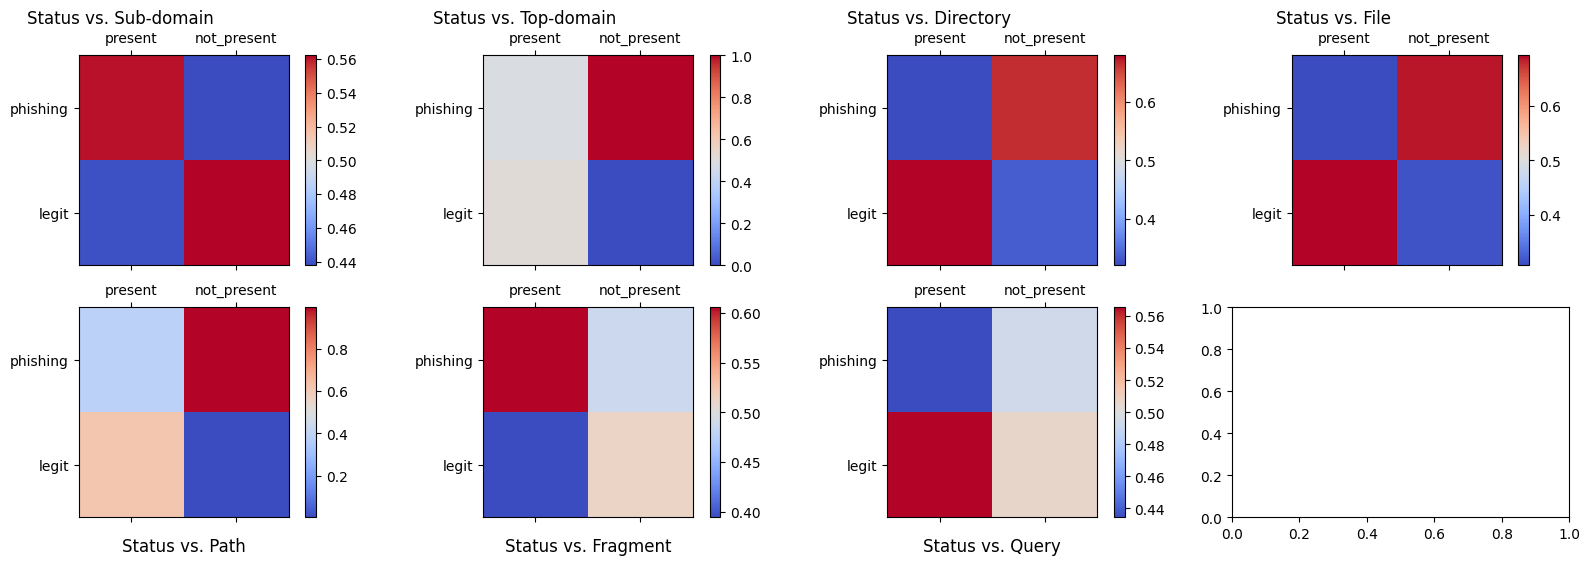

In [54]:
fig, axes = plt.subplots(2, 4, figsize=(20, 6))
im1 = axes[0][0].matshow(heatmap_set[0], cmap='coolwarm') 
fig.colorbar(im1, ax=axes[0][0])
axes[0][0].set_title("Status vs. Sub-domain", x=0.2)
axes[0][0].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][0].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])
#xes[0][0].xlabel("Sub-Domain")
# axes[0][0].ylabel("")

im1 = axes[0][1].matshow(heatmap_set[1], cmap='coolwarm') 
fig.colorbar(im1, ax=axes[0][1])
axes[0][1].set_title("Status vs. Top-domain", x=0.2)
axes[0][1].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][1].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im2 = axes[0][2].matshow(heatmap_set[2], cmap='coolwarm') 
fig.colorbar(im2, ax=axes[0][2])
axes[0][2].set_title("Status vs. Directory", x=0.2)
axes[0][2].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][2].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im3 = axes[0][3].matshow(heatmap_set[3], cmap='coolwarm') 
fig.colorbar(im3, ax=axes[0][3])
axes[0][3].set_title("Status vs. File", x=0.2)
axes[0][3].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][3].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im4 = axes[1][0].matshow(heatmap_set[4], cmap='coolwarm') 
fig.colorbar(im4, ax=axes[1][0])
axes[1][0].set_title("Status vs. Path", y=-0.2)
axes[1][0].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][0].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im5 = axes[1][1].matshow(heatmap_set[5], cmap='coolwarm') 
fig.colorbar(im5, ax=axes[1][1])
axes[1][1].set_title("Status vs. Fragment", y=-0.2)
axes[1][1].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][1].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im6 = axes[1][2].matshow(heatmap_set[6], cmap='coolwarm') 
fig.colorbar(im6, ax=axes[1][2])
axes[1][2].set_title("Status vs. Query", y=-0.2)
axes[1][2].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][2].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

In [ ]:
df

### Total Amount of Predicitve Features Based on Visualizations:
- path, top-domain, n_equals, n_and, url_length, n_period, and domain_spelled_correctly

In [ ]:
df.to_csv("clean_data_.csv", encoding='utf-8')

In [ ]:
df = df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis="columns")

In [ ]:
df.to_csv("clean_data_4.csv", encoding='utf-8')

In [ ]:
df

In [ ]:
df